# Q1. Find the first derivative of your speech signal with finite difference method. Listen to the first derivative signal and the original speech signal.

In [6]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load("/content/drive/MyDrive/AI_SP/AI_SP_audio.wav")
for_dif=[]
for i in range(1, len(y)):
    for_dif.append(y[i] - y[i-1])
for_dif = np.array(for_dif)

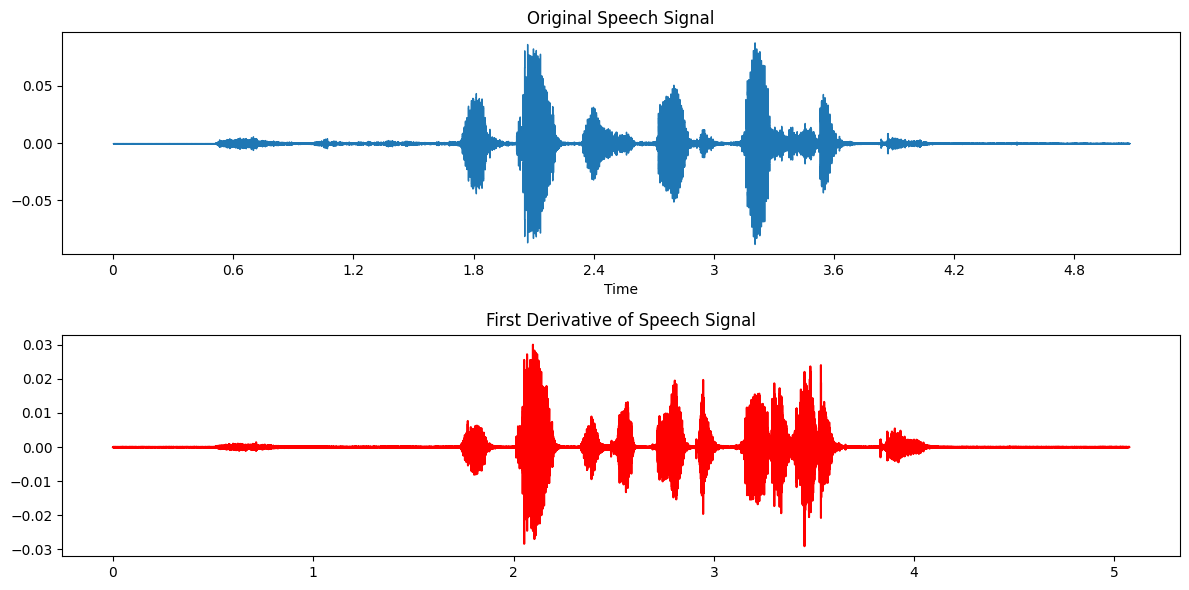

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Speech Signal')

plt.subplot(2, 1, 2)
time_axis = np.arange(0, len(for_dif)) / sr
plt.plot(time_axis, for_dif, color='red')
plt.title('First Derivative of Speech Signal')

plt.tight_layout()
plt.show()

In [8]:
import IPython.display as ipd
print("Original Audio")
ipd.Audio(data=y, rate=sr)

Original Audio


In [9]:
print("First Derivative Audio")
ipd.Audio(data=for_dif, rate=sr)

First Derivative Audio


# Q2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-10-d29f4b26d110>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'green')
<ipython-input-10-d29f4b26d110>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'green')


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 3.063059609539717


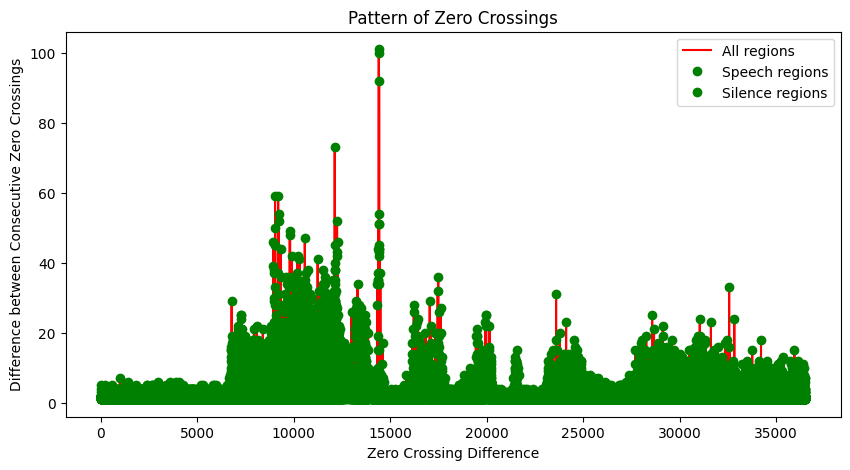

Pattern of Zero Crossings:
All regions: [2 1 1 ... 3 1 3]
Speech regions: []
Silence regions: [2 1 1 ... 3 1 3]


In [10]:
zero_crossing = np.where(np.diff(np.sign(for_dif)))[0]
diff = np.diff(zero_crossing)
threshold = 1000
speech_regions = diff[diff > threshold]
silence_regions = diff[diff <= threshold]

avg_length_speech = np.mean(speech_regions)
avg_length_silence = np.mean(silence_regions)

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)

plt.figure(figsize=(10, 5))
plt.plot(diff, label='All regions',color = 'red')
plt.plot(np.arange(len(speech_regions)), speech_regions, 'ro', label='Speech regions',color = 'green')
plt.plot(np.arange(len(speech_regions), len(speech_regions) + len(silence_regions)), silence_regions, 'bo', label='Silence regions',color = 'green')
plt.title('Pattern of Zero Crossings')
plt.xlabel('Zero Crossing Difference')
plt.ylabel('Difference between Consecutive Zero Crossings')
plt.legend()
plt.show()

print("Pattern of Zero Crossings:")
print("All regions:", diff)
print("Speech regions:", speech_regions)
print("Silence regions:", silence_regions)

# Q3. Speak 5 of your favorite words. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your project team-mate.

Lengths of the spoken words MINE: [2.3535, 2.6735, 1.5335, 2.9335, 2.6135]
Lengths of the spoken words TeamMate: [1.3378333333333334, 2.6735, 1.1778333333333333, 1.6378333333333333, 1.6978333333333333]


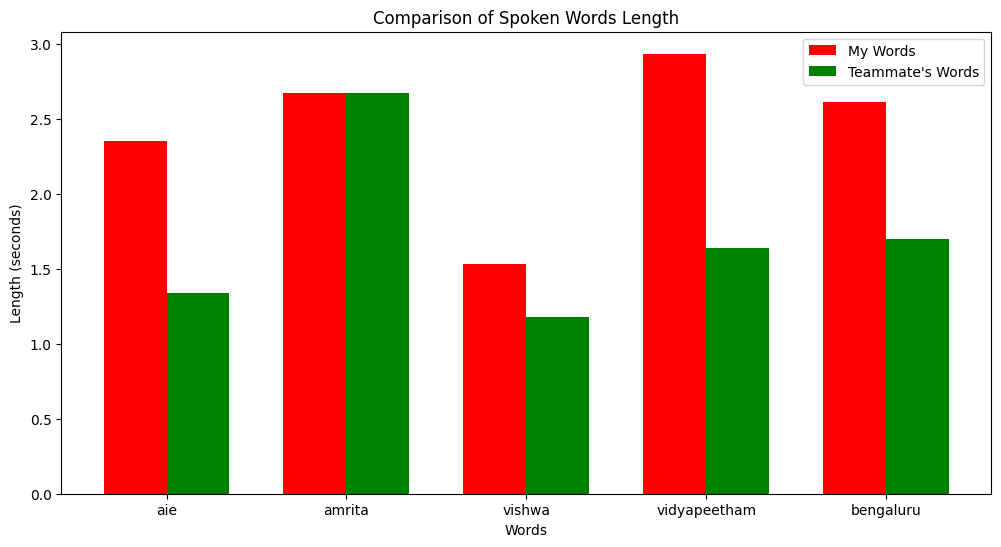

In [12]:
siddhartha_files = ['/content/drive/MyDrive/AI_SP/aie.mp3', '/content/drive/MyDrive/AI_SP/amrita.mp3', '/content/drive/MyDrive/AI_SP/vishwa.mp3', '/content/drive/MyDrive/AI_SP/vidyapeetham.mp3', '/content/drive/MyDrive/AI_SP/bengaluru.mp3']
jaswanth_files = ['/content/drive/MyDrive/AI_SP/aie1.mp3', '/content/drive/MyDrive/AI_SP/amrita.mp3', '/content/drive/MyDrive/AI_SP/vishwa1.mp3','/content/drive/MyDrive/AI_SP/vidyapeetham1.mp3','/content/drive/MyDrive/AI_SP/bengaluru1.mp3']
words = ['aie', 'amrita', 'vishwa', 'vidyapeetham', 'bengaluru']
word_lengths_siddhartha = []
word_lengths_jaswanth = []

for word_file in siddhartha_files:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_siddhartha.append(length_seconds)

for word_file in jaswanth_files:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_jaswanth.append(length_seconds)

print("Lengths of the spoken words MINE:", word_lengths_siddhartha)
print("Lengths of the spoken words TeamMate:", word_lengths_jaswanth)

bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(12, 6))
plt.bar(index - bar_width/2, word_lengths_siddhartha, bar_width, label='My Words', color='red')
plt.bar(index + bar_width/2, word_lengths_jaswanth, bar_width, label="Teammate's Words", color='green')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()

plt.show()

# Q4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals – one with making the statement while other with asking question. Study the two signals and compare them.

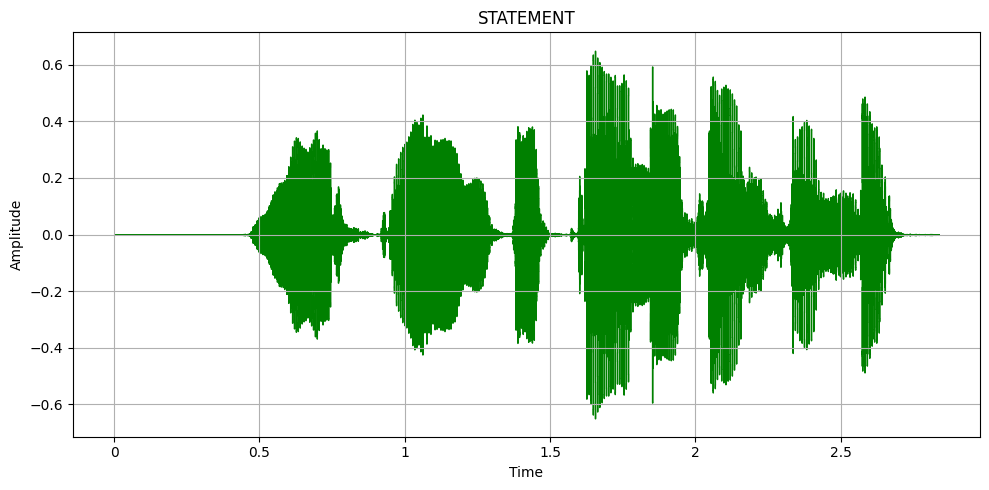

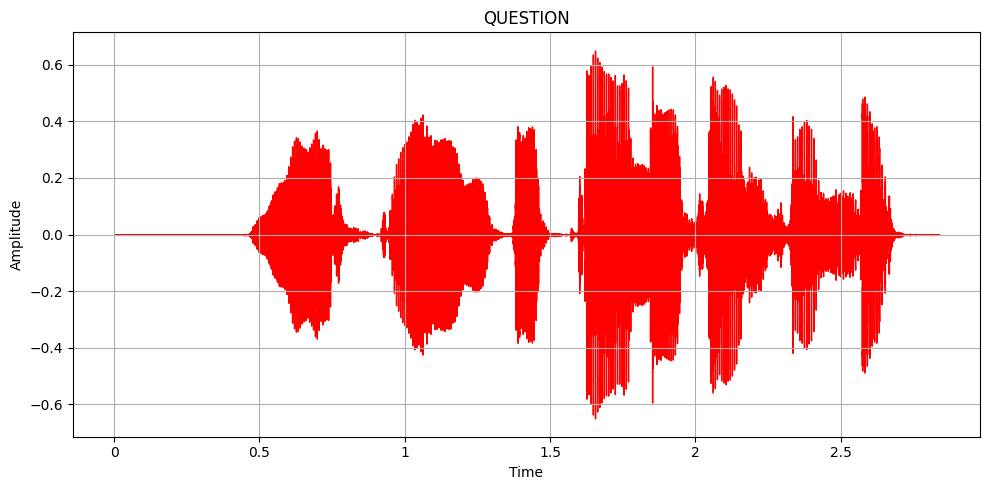

In [15]:
statement, sr1 = librosa.load('/content/drive/MyDrive/AI_SP/Statement.mp3')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='green')
plt.title('STATEMENT')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

question, sr = librosa.load('/content/drive/MyDrive/AI_SP/Question.mp3')
plt.figure(figsize=(10, 5))
librosa.display.waveshow(statement, sr=sr,color='red')
plt.title('QUESTION')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()